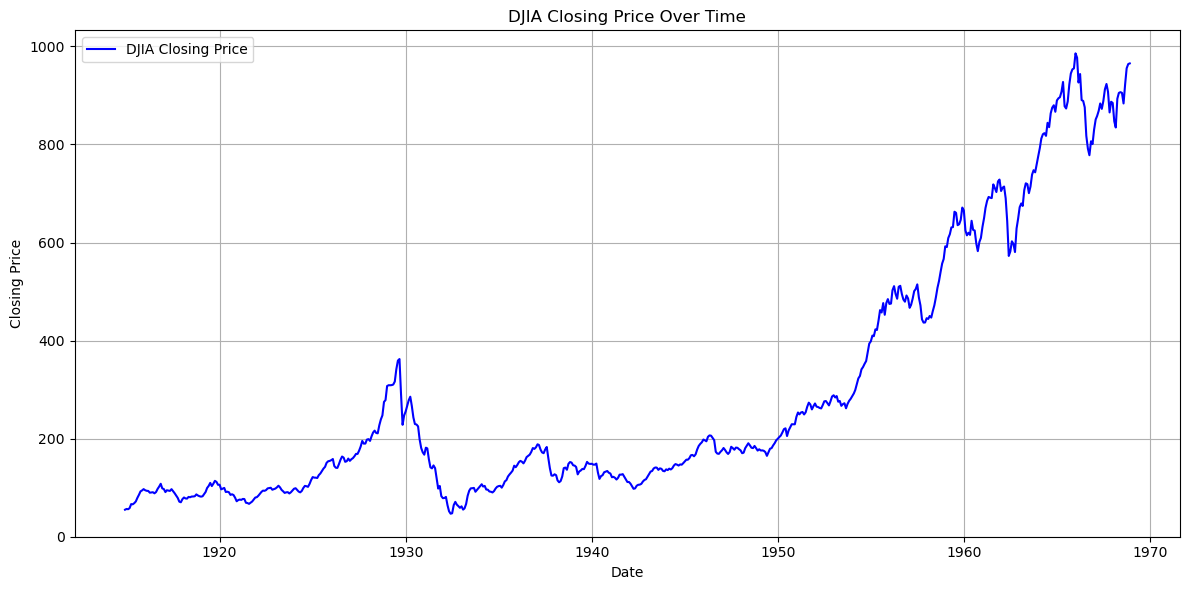

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('dowjones')

df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values(by='Date')

date = df['Date']
closing_price = df['Price']

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(date, closing_price, label='DJIA Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('DJIA Closing Price Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



In [8]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Load the DJIA dataset from a CSV file
df = sns.load_dataset('dowjones')

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by date (if it's not already sorted)
df = df.sort_values(by='Date')

# Create a Dash application
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1('DJIA Closing Price Over Time'),
    dcc.Graph(id='djia-graph'),
    dcc.RangeSlider(
        id='date-slider',
        min=df['Date'].min().timestamp(),
        max=df['Date'].max().timestamp(),
        step=1,
        marks={int(i): pd.Timestamp(i, unit='s').strftime('%Y-%m-%d') for i in range(
            int(df['Date'].min().timestamp()), int(df['Date'].max().timestamp()), 3600 * 24 * 30)},
        value=[df['Date'].min().timestamp(), df['Date'].max().timestamp()],
        tooltip={'placement': 'bottom', 'always_visible': True, 'dateFormat': 'YYYY-MM-DD'},
    )
])

# Define callback to update the graph based on the date range selected
@app.callback(
    Output('djia-graph', 'figure'),
    Input('date-slider', 'value')
)
def update_graph(selected_dates):
    start_date = pd.Timestamp(selected_dates[0], unit='s')
    end_date = pd.Timestamp(selected_dates[1], unit='s')
    
    filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    
    fig = px.line(filtered_df, x='Date', y='Price', title='DJIA Closing Price Over Time')
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)
